### Rewrite at 2024/7/5

In [3]:
# all library will used
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

對csv檔案進行處理，當中只有`sales`跟`salary`欄位需要進行處理，方法先對salary做label-encoding，sales則是frequency-encoding

In [42]:
df = pd.read_csv('HW2_hr-analytics_train.csv')

# label-encoding
labelencoder = LabelEncoder()
df['salary'] = labelencoder.fit_transform(df['salary'])

# frequency encoding - 統計比例取代類別資料
frequency_encoded = df['sales'].value_counts() / len(df)
df['sales'] = df['sales'].map(frequency_encoded)

# 填補缺失值
df.fillna(0, inplace=True)

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
0,0.41,0.50,2,153,3,0,0,0.2728,1,1
1,0.92,0.85,5,259,5,0,0,0.2728,1,1
2,0.89,1.00,5,224,5,0,0,0.2728,1,1
3,0.45,0.54,2,135,3,0,0,0.2728,1,1
4,0.84,0.92,4,234,5,0,0,0.2728,1,1


#### 這邊是做One-hot-encoding

In [4]:
db = pd.read_csv('HW2_hr-analytics_train.csv')
# one-hot encoding
df = pd.get_dummies(db, columns = ['sales', 'salary'], dtype=float)

# 填補缺失值
df.fillna(0, inplace=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.41,0.50,2,153,3,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.92,0.85,5,259,5,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.89,1.00,5,224,5,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.45,0.54,2,135,3,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.84,0.92,4,234,5,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


#### 試試看one-hot + label encoding

In [3]:
df = pd.read_csv('HW2_hr-analytics_train.csv')

# label-encoding for salary column
labelencoder = LabelEncoder()
df['salary'] = labelencoder.fit_transform(df['salary'])
# one-hot encoding for sales column
df = pd.get_dummies(df, columns = ['sales'], dtype=float)

df.fillna(0, inplace=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.41,0.50,2,153,3,0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.92,0.85,5,259,5,0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.89,1.00,5,224,5,0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.45,0.54,2,135,3,0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.84,0.92,4,234,5,0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


標準化(但針對['average_montly_hours']就好)，因為encoding會失準，還有原先看起來不是連續類別的資料

In [5]:
# Define X (input features) and y (target variable)
X = df.drop(columns=['left'])
y = df['left']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 1. use IQR method to identify the outlier.

# merge two dataframe first
combine = X_train.copy()
combine['result'] = y_train

# Define a function to identify and remove outliers
col = X.columns
def remove_outliers(df, columns, threshold=1.5):
    outliers = pd.DataFrame()
    for col in columns:
        # quantile to select the 第幾分位數
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        column_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers = pd.concat([outliers, column_outliers], axis=0)
    return df[~df.index.isin(outliers.index)]

# pick out outlier
combine = remove_outliers(combine, col)
# Split into the two dataframe
X_train = combine.drop(columns=['result'])
y_train = combine['result']

# 2.  standardize
scaler = StandardScaler()
# 將X_train 的 feature標準化
data_to_standardize = X_train[['average_montly_hours']] 
scaler.fit(data_to_standardize)
standardized_data = scaler.transform(data_to_standardize)
X_train[['average_montly_hours']] = standardized_data
# 將X_test 的 feature標準化
data_to_standardize = X_test[['average_montly_hours']] 
scaler.fit(data_to_standardize)
standardized_data = scaler.transform(data_to_standardize)
X_test[['average_montly_hours']] = standardized_data

X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
4901,0.66,0.66,4,1.116818,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4375,0.86,0.50,4,-0.052053,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6698,0.77,0.70,4,0.661156,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9805,0.37,0.49,2,-0.943566,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
118,0.38,0.50,2,-1.161491,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5051,0.24,0.50,4,0.205495,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6949,0.83,0.53,3,-0.250167,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
769,0.10,0.88,7,2.008330,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4426,0.13,0.88,3,-1.042622,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


#### 套模

In [6]:
lr = LogisticRegression()   # 創建羅吉斯回歸模型
lr.fit(X_train, y_train)     # 訓練模型

LogisticRegression()

#### 畫混淆矩陣

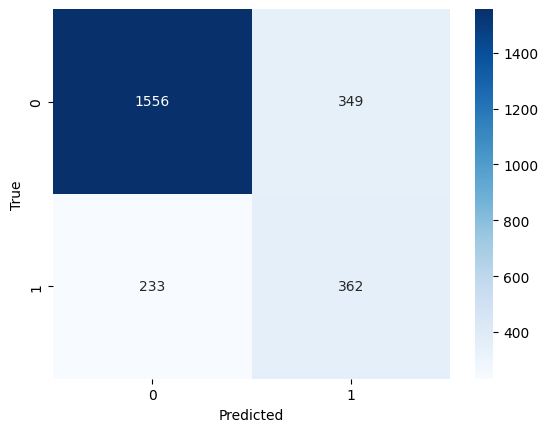

Accuracy: 0.7672
Precision: 0.509142053445851
Recall: 0.6084033613445378
F1 score: 0.554364471669219


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score, recall_score, f1_score , accuracy_score

# 假設你已經有了模型的預測結果和真實標籤
y_true = y_test
y_pred = lr.predict(X_test)

# 計算混淆矩陣
cm = confusion_matrix(y_true, y_pred)

# 使用熱圖可視化混淆矩陣
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 計算準確率
accuracy = accuracy_score(y_true, y_pred)
print('Accuracy:', accuracy)
# Calculate precision
precision = precision_score(y_true, y_pred)
print('Precision:', precision)

# Calculate recall
recall = recall_score(y_true, y_pred)
print('Recall:', recall)

# Calculate F1-score
f1 = f1_score(y_true, y_pred)
print('F1 score:', f1)

#### 接下來已有沒有做 標準化 跟 踢除離群值討論

##### 以freq + label encoding
* 什麼都沒做，準確率不錯  
Accuracy: 0.7652  
Precision: 0.5136054421768708  
Recall: 0.253781512605042  
F1 score: 0.33970753655793023  
* 如果只有做挑離群值，則準確率剛好76% , precision, recall, f1-score明顯上升  
Accuracy: 0.7632  
Precision: 0.5021707670043415  
Recall: 0.5831932773109244  
F1 score: 0.5396578538102644  
* 只有標準化較原先差異不大  
Accuracy: 0.76  
Precision: 0.49158249158249157  
Recall: 0.2453781512605042  
F1 score: 0.3273542600896861  
* 兩者都做，則近似挑除離群值的效果  
Accuracy: 0.7596  
Precision: 0.4956140350877193  
Recall: 0.5697478991596638  
F1 score: 0.5301016419077403  


##### 如果都採用One-hot-encoding會如何?
* 什麼都沒做，準確率、precision不錯  
Accuracy: 0.7884  
Precision: 0.5964912280701754  
Recall: 0.34285714285714286  
F1 score: 0.43543223052294555   
* 如果只有做挑離群值，則準確率掉一點 , precision, recall, f1-score明顯上升  
Accuracy: 0.7656  
Precision: 0.5059445178335535  
Recall: 0.6436974789915967  
F1 score: 0.5665680473372781  
* 只有標準化較原先差異不大  
Accuracy: 0.782  
Precision: 0.5744047619047619  
Recall: 0.3243697478991597  
F1 score: 0.4146079484425349  
* 兩者都做，則近似挑除離群值的效果  
Accuracy: 0.7672  
Precision: 0.509142053445851  
Recall: 0.6084033613445378  
F1 score: 0.554364471669219  


#### One-hot encoding + label encoding
* 什麼都沒做，準確率、precision不錯  
Accuracy: 0.7616  
Precision: 0.49829351535836175  
Recall: 0.2453781512605042  
F1 score: 0.3288288288288288  
* 如果只有做挑離群值，整體表現都變好
Accuracy: 0.7704
Precision: 0.5146036161335188  
Recall: 0.6218487394957983  
F1 score: 0.5631659056316591  
* 只有標準化較原先差異不大  
Accuracy: 0.76  
Precision: 0.49158249158249157  
Recall: 0.2453781512605042  
F1 score: 0.3273542600896861  
* 兩者都做，則近似挑除離群值的效果  
Accuracy: 0.768  
Precision: 0.5106082036775106  
Recall: 0.6067226890756302  
F1 score: 0.5545314900153611  


結果都用`one-hot-encoding`表現最好

#### 接著直接跑測試資料看看

In [80]:
# 之前做過處理也要仿造一次
df2 = pd.read_csv('HW2_hr-analytics_test.csv')

# one-hot encoding
df = pd.get_dummies(df2, columns = ['sales', 'salary'], dtype=float)
df.head()

# 標準化
data_to_standardize = df[['average_montly_hours']] 
scaler.fit(data_to_standardize)
standardized_data = scaler.transform(data_to_standardize)
df[['average_montly_hours']] = standardized_data

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.96,0.60,3,-0.827940,10,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.40,0.53,2,-0.927944,3,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.48,0.93,3,0.352100,6,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.10,0.77,6,1.272131,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.83,0.89,4,-1.307957,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [82]:
result = lr.predict(df)  # 預測結果

# 轉成dataframe
data = pd.DataFrame({'left': result})
data.to_csv('HW2_hr-analytics_test_sol.csv', index = False)

data

,left
0,1
1,1
2,1
3,1
4,0
...,...
4995,0
4996,1
4997,1
4998,0
